In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
# !git clone https://github.com/zalandoresearch/fashion-mnist.git

In [21]:
from tensorflow.keras.datasets import fashion_mnist

# 장수가 너무 많음 보통 메모리에 60000장 다올라와있는데 보통은 빅데이터는 조금씩 올린다. 순차적으로 하드디스크에서 메모리로올린다.
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [22]:
# import os
# import struct
# import sys

# from array import array
# from os import path
# import png

In [23]:
type(X_test)

numpy.ndarray

In [24]:
class_name = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','AnkleBoot']

### 시각화

In [25]:
# 시각화

samples = np.random.randint(60000,size=9)
samples

array([13469, 29587,    36, 24290, 26565, 28283, 43714, 27073,  8937])

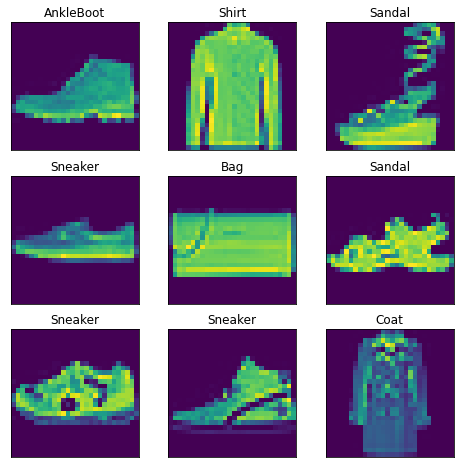

In [26]:
plt.figure(figsize=(8,8))
for i,idx in enumerate(samples):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[idx])
  plt.xticks([])
  plt.yticks([])
  plt.title(class_name[y_train[idx]])
plt.show()

### validation data

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3)

print(X_train.shape,X_val.shape)
print(y_train.shape,y_val.shape)

(42000, 28, 28) (18000, 28, 28)
(42000,) (18000,)


### 정규화

In [28]:
# normalization 보통 이미지는 최소-최대 정규화를 사용한다.
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [29]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [30]:
y_train[:10]

array([9, 7, 1, 6, 1, 2, 0, 6, 1, 2], dtype=uint8)

In [31]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [32]:
y_train_oh

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [33]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(42000, 28, 28, 1)

In [34]:
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

### 모델

In [35]:
# Sequential 생성할때 , 지정하는 모델
def build_model_1():
  model = keras.Sequential([
      layers.Conv2D(filters=32,kernel_size=3,activation='relu',
                    input_shape=(28,28,1)),
      layers.MaxPool2D(pool_size=(2,2)),

      layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
      layers.MaxPool2D(pool_size=(2,2)),

      layers.Flatten(),
      layers.Dense(units=32,activation='relu'),
      layers.Dense(units=10,activation='softmax')
  ])

  model.compile(
      optimizer='rmsprop',
      loss='categorical_crossentropy',
      metrics=['acc'],
      loss_weights=None,
      run_eagerly=None,
      steps_per_execution=None,
      jit_compile=None
  )
  return model

model = build_model_1()

def build_model_2():
  model = keras.Sequential()
  x = 1
  if  x == 1:
    model.add()
  model.add()
  model.add()
  model.add()
  model.add()

  model.compile(
      optimizer='rmsprop',
      loss='categorical_crossentropy',
      metrics=['acc'],
      loss_weights=None,
      run_eagerly=None,
      steps_per_execution=None,
      jit_compile=None
  )
  return model


### 함수형 api
- Sequential로 만들 수 없는 모델을 만들 경우 사용

In [49]:
from tensorflow.keras.models import Model

def build_model_3():
  inputs = layers.Input(shape=(28,28,1))
  x1 = layers.Conv2D(filters=32,kernel_size=3,activation='relu',
                    input_shape=(28,28,1))
  x2 = layers.MaxPool2D(pool_size=(2,2))(x1)
  x3 = layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x2)
  x4 = layers.MaxPool2D(pool_size=(2,2))(x3)
  x5 = layers.Flatten()(x4)
  x6 = layers.Dense(units=32,activation='relu')(x5)
  outputs = layers.Dense(units=10,activation='softmax')(x6)

  model = Model(inputs=inputs,outputs=outputs)

  return model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [37]:
%%time
# learning
EPOCHS = 10
BATCH_SIZE = 32
# 1 iteration = batch_size 이다. 60000장이니까 한번 배치사이즈만큼 돌려서 train_data를 모두 다 소진하면 1 epoch 이고
# 60000/32 가 1 iteration의 개수이다. 

log = model.fit(X_train,y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data=(X_val,y_val_oh))

Epoch 1/10
1313/1313 [==============================] - 79s 59ms/step - loss: 0.5317 - acc: 0.8042 - val_loss: 0.3971 - val_acc: 0.8558
Epoch 2/10
1313/1313 [==============================] - 53s 40ms/step - loss: 0.3387 - acc: 0.8777 - val_loss: 0.3672 - val_acc: 0.8659
Epoch 3/10
1313/1313 [==============================] - 51s 39ms/step - loss: 0.2885 - acc: 0.8946 - val_loss: 0.2891 - val_acc: 0.8966
Epoch 4/10
1313/1313 [==============================] - 61s 46ms/step - loss: 0.2574 - acc: 0.9066 - val_loss: 0.2669 - val_acc: 0.9067
Epoch 5/10
1313/1313 [==============================] - 56s 43ms/step - loss: 0.2342 - acc: 0.9137 - val_loss: 0.2672 - val_acc: 0.9047
Epoch 6/10
1313/1313 [==============================] - 53s 40ms/step - loss: 0.2175 - acc: 0.9207 - val_loss: 0.3160 - val_acc: 0.8947
Epoch 7/10
1313/1313 [==============================] - 59s 45ms/step - loss: 0.2028 - acc: 0.9264 - val_loss: 0.2828 - val_acc: 0.9034
Epoch 8/10
1313/1313 [==========================

In [38]:
## 시각화

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

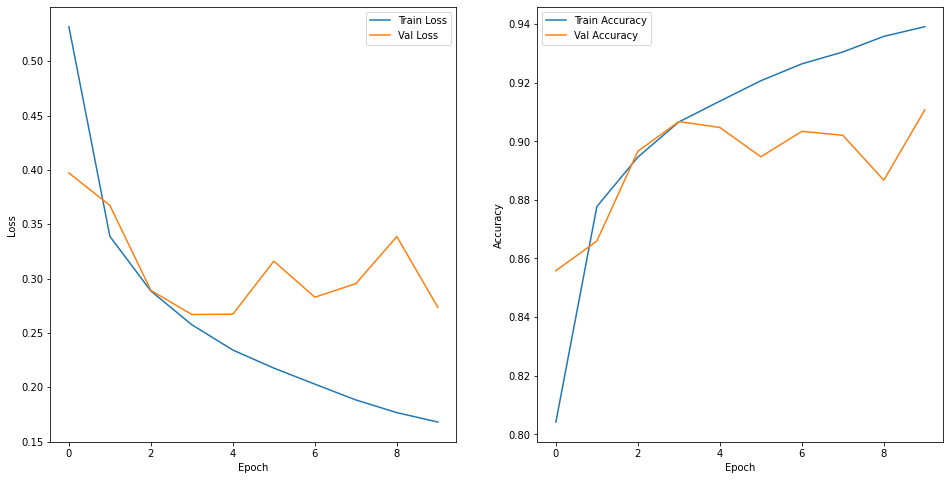

In [39]:
plot_history(log)

In [40]:
model.evaluate(X_train,y_train_oh)

1313/1313 [==============================] - 14s 11ms/step - loss: 0.1425 - acc: 0.9495


[0.1424761712551117, 0.9494524002075195]

In [41]:
model.evaluate(X_test,y_test_oh)

313/313 [==============================] - 4s 11ms/step - loss: 0.2906 - acc: 0.9067


[0.2906206250190735, 0.9067000150680542]

In [42]:
# 예측
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 11ms/step


array([[1.80612025e-10, 7.34216841e-16, 2.35031106e-10, 2.30538462e-13,
        1.84920926e-13, 2.88566048e-06, 2.40133557e-09, 1.46917873e-05,
        1.12867349e-09, 9.99982417e-01],
       [1.02040121e-06, 1.19555312e-15, 9.99970496e-01, 1.12926396e-11,
        2.74979811e-05, 3.33101060e-13, 9.31041598e-07, 1.82825719e-13,
        2.05169193e-12, 9.28008503e-10],
       [9.92436688e-10, 9.99999940e-01, 5.34392815e-14, 2.76137706e-12,
        5.37861942e-12, 6.74601694e-12, 3.42672993e-13, 5.38651455e-23,
        2.47117843e-12, 2.01228838e-14],
       [2.34965641e-11, 9.99999940e-01, 2.26602553e-15, 5.37677576e-11,
        2.04559512e-11, 4.92583743e-14, 4.40388774e-13, 1.04444723e-22,
        1.02452010e-13, 2.32878105e-14],
       [4.82161164e-01, 1.53545230e-08, 4.44625597e-03, 4.36901720e-03,
        6.81139529e-03, 5.40086830e-07, 5.02205610e-01, 5.42133785e-06,
        5.10699692e-07, 1.06674754e-07]], dtype=float32)

In [43]:
# 가장큰 값의 인덱스를 반환한다.
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

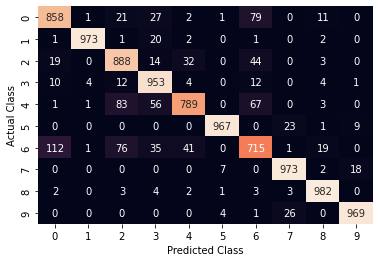

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cbar=False,fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [45]:
# 오답 이미지를 시각화

samples = np.where((y_test == y_pred) == False)[0]
samples
samples = np.random.choice(samples,9)
X_test = X_test.reshape(-1,28,28)

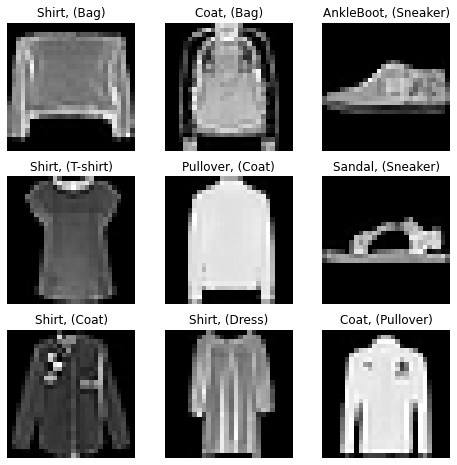

In [46]:
plt.figure(figsize=(8,8))
for i,idx in enumerate(samples):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[idx],cmap='gray')
  plt.axis('off')
  plt.title(f'{class_name[y_test[idx]]}, ({class_name[y_pred[idx]]})')
plt.show()

In [51]:
# 입력이 2개인 임의의 모델

inputX = layers.Input(shape=(16,))
x1 = layers.Dense(8, activation='relu')(inputX)
x2 = layers.Dense(16, activation='relu')(x1)
x3 = Model(inputs=inputX, outputs=x2)

inputY = layers.Input(shape=(16,))
x4 = layers.Dense(8, activation='relu')(inputY)
x5 = layers.Dense(16, activation='relu')(x4)
x6 = Model(inputs=inputY, outputs=x5)

combined = layers.concatenate([x3.output,x6.output])
z1 = layers.Dense(2,activation='relu')(combined)
z2 = layers.Dense(1)(z1)

model = Model(inputs=[x3.input,x6.input],
              outputs=z2)

In [52]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 8)            136         ['input_3[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 8)            136         ['input_4[0][0]']                
                                                                                            

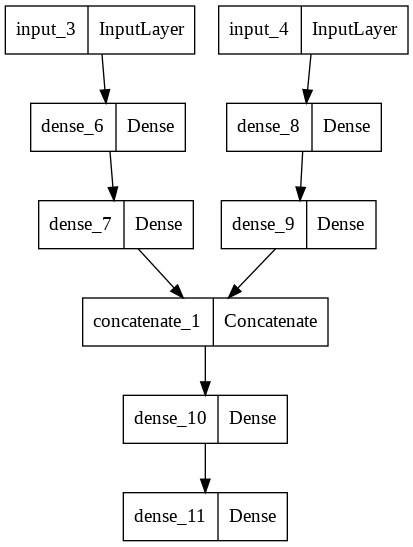

In [53]:
tf.keras.utils.plot_model(model)

### 서브클래싱(Subclassing)
- 모델을 클래스로 만드는 것

In [56]:
class MnistModel(Model):
  def __init__(self):
    super(MnistModel,self).__init__()
    self.conv1 = layers.Conv2D(32,3,activation='relu')
    self.conv2 = layers.Conv2D(64,3,activation='relu')
    self.maxpool = layers.MaxPooling2D(2)
    self.flat = layers.Flatten()
    self.dense1 = layers.Dense(32,activation='relu')
    self.dense2 = layers.Dense(10,activation='softmax')
  
  def call(self,inputs):
    x = self.conv1(inputs)
    x = self.conv2(x)
    x = self.maxpool(x)
    x = self.flat(x)
    x = self.dense1(x)
    x = self.dense2(x)
    outputs = self.dense2(x)

    return outputs

In [57]:
model = MnistModel()
model.compile(...)
model.fit(
    
)

ValueError: ignored